In [1]:
import numpy as np
import os
import pandas as pd

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

from Siamese_model import SiameseTrainer

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


c:\Users\mathi\anaconda3\envs\tensorflow_new\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_and_preprocess_image(path, target_size=(96, 96)):
    img = load_img(path, target_size=target_size, color_mode='grayscale', interpolation='lanczos')
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize to [0,1]
    return img

def load_pairs_and_labels(csv_path, image_base_path):
    df = pd.read_csv(csv_path)
    pair_images = []
    labels = df['label'].values
    
    for idx, row in df.iterrows():
        img1_path = os.path.join(image_base_path, row['image_1'])
        img2_path = os.path.join(image_base_path, row['image_2'])
        
        img1 = load_and_preprocess_image(img1_path)
        img2 = load_and_preprocess_image(img2_path)
        
        pair_images.append(np.concatenate([img1, img2], axis=0))
    
    # Convert list of pairs to a numpy array
    pairs = np.array(pair_images)
    
    # Since each image pair is concatenated along axis=0, we reshape to ensure
    # the final structure is compatible with what train_model expects
    pairs = pairs.reshape(-1, 2, *pairs.shape[2:])
    
    return pairs, labels


In [3]:
def new_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
        MaxPooling2D((2,2)),
        Dropout(0.25),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(256, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [4]:
input_shape = (96, 96, 1)
num_classes = 3

In [5]:
model_new = new_model(input_shape, num_classes)

In [6]:
# Define path for quater dataset
image_base_path = '../OpenSARShip/Categories/'

train_csv_path = os.getcwd() + "/Split_quater_siamese/train_pairs.csv"
val_csv_path = os.getcwd() + "/Split_quater_siamese/val_pairs.csv"
test_csv_path = os.getcwd() + "/Split_quater_siamese/test_pairs.csv"

# Load and preprocess the data
print("Loading and preprocessing the data train")
train_pairs, train_labels = load_pairs_and_labels(train_csv_path, image_base_path)
print("Loading and preprocessing the data val")
val_pairs, val_labels = load_pairs_and_labels(val_csv_path, image_base_path)
print("Loading and preprocessing the data test")
test_pairs, test_labels = load_pairs_and_labels(test_csv_path, image_base_path)

Loading and preprocessing the data train
Loading and preprocessing the data val
Loading and preprocessing the data test


Creating the SiameseTrainer
Compiling the model
Training the model
Epoch 1/100
96/96 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.4903
Epoch 1: val_accuracy improved from -inf to 0.54790, saving model to Siam_batch128_quater_data_interpol_ter.pth
INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


96/96 [==============================] - 84s 857ms/step - loss: 0.6943 - accuracy: 0.4903 - val_loss: 0.6943 - val_accuracy: 0.5479 - lr: 1.0000e-04
Epoch 2/100
96/96 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5397
Epoch 2: val_accuracy did not improve from 0.54790
96/96 [==============================] - 78s 816ms/step - loss: 0.6925 - accuracy: 0.5397 - val_loss: 0.6934 - val_accuracy: 0.5392 - lr: 1.0000e-04
Epoch 3/100
96/96 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.5615
Epoch 3: val_accuracy improved from 0.54790 to 0.57039, saving model to Siam_batch128_quater_data_interpol_ter.pth
INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


96/96 [==============================] - 81s 843ms/step - loss: 0.6917 - accuracy: 0.5615 - val_loss: 0.6927 - val_accuracy: 0.5704 - lr: 1.0000e-04
Epoch 4/100
96/96 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.5906
Epoch 4: val_accuracy improved from 0.57039 to 0.57547, saving model to Siam_batch128_quater_data_interpol_ter.pth
INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


96/96 [==============================] - 81s 843ms/step - loss: 0.6906 - accuracy: 0.5906 - val_loss: 0.6923 - val_accuracy: 0.5755 - lr: 1.0000e-04
Epoch 5/100
96/96 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.5890
Epoch 5: val_accuracy did not improve from 0.57547
96/96 [==============================] - 79s 827ms/step - loss: 0.6900 - accuracy: 0.5890 - val_loss: 0.6920 - val_accuracy: 0.5646 - lr: 1.0000e-04
Epoch 6/100
96/96 [==============================] - ETA: 0s - loss: 0.6889 - accuracy: 0.5900
Epoch 6: val_accuracy did not improve from 0.57547
96/96 [==============================] - 79s 822ms/step - loss: 0.6889 - accuracy: 0.5900 - val_loss: 0.6917 - val_accuracy: 0.5624 - lr: 1.0000e-04
Epoch 7/100
96/96 [==============================] - ETA: 0s - loss: 0.6885 - accuracy: 0.5896
Epoch 7: val_accuracy did not improve from 0.57547
96/96 [==============================] - 79s 823ms/step - loss: 0.6885 - accuracy: 0.5896 - val_loss: 0.6911 - val_

INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


96/96 [==============================] - 80s 832ms/step - loss: 0.6804 - accuracy: 0.5988 - val_loss: 0.6860 - val_accuracy: 0.5791 - lr: 1.0000e-04
Epoch 21/100
96/96 [==============================] - ETA: 0s - loss: 0.6799 - accuracy: 0.5956
Epoch 21: val_accuracy did not improve from 0.57910
96/96 [==============================] - 79s 824ms/step - loss: 0.6799 - accuracy: 0.5956 - val_loss: 0.6863 - val_accuracy: 0.5682 - lr: 1.0000e-04
Epoch 22/100
96/96 [==============================] - ETA: 0s - loss: 0.6792 - accuracy: 0.5930
Epoch 22: val_accuracy improved from 0.57910 to 0.58128, saving model to Siam_batch128_quater_data_interpol_ter.pth
INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


96/96 [==============================] - 80s 835ms/step - loss: 0.6792 - accuracy: 0.5930 - val_loss: 0.6852 - val_accuracy: 0.5813 - lr: 1.0000e-04
Epoch 23/100
96/96 [==============================] - ETA: 0s - loss: 0.6790 - accuracy: 0.5975
Epoch 23: val_accuracy improved from 0.58128 to 0.58273, saving model to Siam_batch128_quater_data_interpol_ter.pth
INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


96/96 [==============================] - 81s 846ms/step - loss: 0.6790 - accuracy: 0.5975 - val_loss: 0.6845 - val_accuracy: 0.5827 - lr: 1.0000e-04
Epoch 24/100
96/96 [==============================] - ETA: 0s - loss: 0.6785 - accuracy: 0.5953
Epoch 24: val_accuracy did not improve from 0.58273
96/96 [==============================] - 79s 828ms/step - loss: 0.6785 - accuracy: 0.5953 - val_loss: 0.6856 - val_accuracy: 0.5697 - lr: 1.0000e-04
Epoch 25/100
96/96 [==============================] - ETA: 0s - loss: 0.6780 - accuracy: 0.5963
Epoch 25: val_accuracy improved from 0.58273 to 0.58708, saving model to Siam_batch128_quater_data_interpol_ter.pth
INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


96/96 [==============================] - 81s 846ms/step - loss: 0.6780 - accuracy: 0.5963 - val_loss: 0.6842 - val_accuracy: 0.5871 - lr: 1.0000e-04
Epoch 26/100
96/96 [==============================] - ETA: 0s - loss: 0.6777 - accuracy: 0.5952
Epoch 26: val_accuracy did not improve from 0.58708
96/96 [==============================] - 78s 816ms/step - loss: 0.6777 - accuracy: 0.5952 - val_loss: 0.6839 - val_accuracy: 0.5784 - lr: 1.0000e-04
Epoch 27/100
96/96 [==============================] - ETA: 0s - loss: 0.6770 - accuracy: 0.5939
Epoch 27: val_accuracy did not improve from 0.58708
96/96 [==============================] - 79s 819ms/step - loss: 0.6770 - accuracy: 0.5939 - val_loss: 0.6840 - val_accuracy: 0.5813 - lr: 1.0000e-04
Epoch 28/100
96/96 [==============================] - ETA: 0s - loss: 0.6766 - accuracy: 0.5942
Epoch 28: val_accuracy did not improve from 0.58708
96/96 [==============================] - 79s 822ms/step - loss: 0.6766 - accuracy: 0.5942 - val_loss: 0.6837 

INFO:tensorflow:Assets written to: Siam_batch128_quater_data_interpol_ter.pth\assets


New best model with validation accuracy 0.5747460126876831 saved as Siam_batch128_quater_data_interpol_ter.pth
Plotting the training history


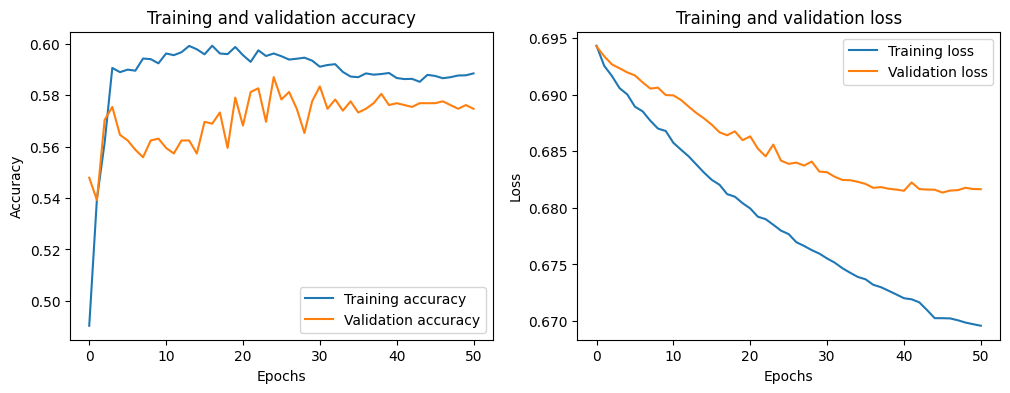

Evaluating the model
42/42 [==============================] - 2s 50ms/step - loss: 0.6799 - accuracy: 0.5784
Test accuracy:  0.5784313678741455


In [7]:
# Assuming `simple_cnn` and `SiameseTrainer` are defined as before
print("Creating the SiameseTrainer")
siamese_network = SiameseTrainer(base_model_func=new_model, input_shape=(96, 96, 1), num_classes=num_classes)
# siamese_network = SiameseTrainer(base_model_func=new_model, input_shape=(96, 96, 1), num_classes=num_classes)

# Set the optimizer
initial_learning_rate = 0.0001
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=1000,
#     decay_rate=0.96,
#     staircase=True)

optimizer = Adam(learning_rate=initial_learning_rate)

# Compile the model
print("Compiling the model")
# siamese_network.compile_model(optimizer='adam', loss='binary_crossentropy')
siamese_network.compile_model(optimizer=optimizer, loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode = 'min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode = 'min')

# Train the model
print("Training the model")
# siamese_network.train_model(train_pairs, train_labels, val_pairs, val_labels, epochs=10, batch_size=32)
siamese_network.train_model(train_pairs, train_labels, val_pairs, val_labels, epochs=100, batch_size=128, model_save_name='Siam_batch128_quater_data_interpol_ter.pth',
                            callbacks=[early_stopping, reduce_lr])


# Plot training history
print("Plotting the training history")
siamese_network.plot_training()

# Evaluate the model
print("Evaluating the model")
siamese_network.evaluate_model(test_pairs, test_labels)


In [8]:
# print(os.getcwd())
# print(os.path.join(os.getcwd(), '../OpenSARShip/Categories/'))
base_dir = os.path.abspath('../OpenSARShip/Categories/')
print(base_dir)

c:\Users\mathi\Julia\Projet_3A\OpenSARShip\Categories


In [9]:
def get_category_from_path(file_path):
    # Extracts the category from the file path based on your directory structure
    category = file_path.split('\\')[0]
    return category


In [10]:
# Reference of the images
# image_base_path = '../OpenSARShip/Categories/'
image_base_path = os.path.abspath('../OpenSARShip/Categories/')

reference_images = {
    'Tanker' : [load_and_preprocess_image(image_base_path + '/Tanker/Tanker_Visual_Cargo_x6945_y4168_vv.tif'),
                load_and_preprocess_image(image_base_path + '/Tanker/Tanker_Visual_Cargo_x52546_y8377_vv.tif')],
    'Container Ship' : [load_and_preprocess_image(image_base_path + '/Container Ship/ContainerShip_Visual_Cargo_x186_y2504_vv.tif'),
                        load_and_preprocess_image(image_base_path + '/Container Ship/ContainerShip_Visual_Cargo_x215_y7247_vv.tif')],
    'Bulk Carrier' : [load_and_preprocess_image(image_base_path + '/Bulk Carrier/BulkCarrier_Visual_Cargo_x48_y7700_vv.tif'),
                      load_and_preprocess_image(image_base_path + '/Bulk Carrier/BulkCarrier_Visual_Cargo_x123_y5601_vv.tif')]
}

In [11]:
def classify_test_image(test_image, siamese_model, reference_images):
    highest_similarity = 0
    predicted_category = None
    
    for category, refs in reference_images.items():
        category_similarity = 0
        
        for ref_img in refs:
            # Ensure both test_image and ref_img are 4-dimensional
            # (1, Height, Width, Channels)
            similarity = siamese_model.predict([test_image, ref_img])[0][0]
            category_similarity += similarity
        
        # Calculate average similarity for this category
        category_similarity /= len(reference_images[category])
        
        if category_similarity > highest_similarity:
            highest_similarity = category_similarity
            predicted_category = category
            
    return predicted_category



In [12]:
test_df = pd.read_csv(os.path.join(os.getcwd(), 'Split_quater_siamese/test_pairs.csv'))


predictions = []
true_categories = []

for index, row in test_df.iterrows():
    # img1_path = os.path.join('OpenSARShip/Categories', row['image_1'])
    img1_path = os.path.join(os.path.abspath('../OpenSARShip/Categories'), row['image_1'])
    img1_category = get_category_from_path(row['image_1'])
    img1 = load_and_preprocess_image(img1_path)
    
    predicted_category = classify_test_image(img1, siamese_network.model, reference_images)
    
    predictions.append(predicted_category)
    true_categories.append(img1_category)

# Now you can calculate classification metrics based on `predictions` and `true_categories`


1/1 [==============================] - 0s 33ms/step


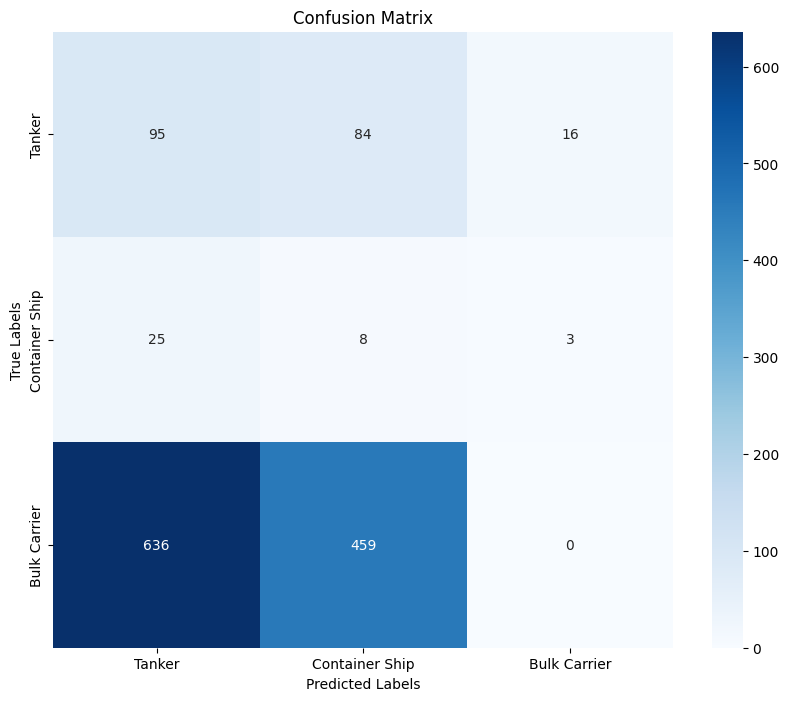

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming true_categories holds the true class labels, and predictions holds the predicted labels from your model
conf_matrix = confusion_matrix(true_categories, predictions, labels=list(reference_images.keys()))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(reference_images.keys()), yticklabels=list(reference_images.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [14]:
print(classification_report(true_categories, predictions, target_names=list(reference_images.keys())))


                precision    recall  f1-score   support

        Tanker       0.00      0.00      0.00      1095
Container Ship       0.01      0.22      0.03        36
  Bulk Carrier       0.13      0.49      0.20       195

      accuracy                           0.08      1326
     macro avg       0.05      0.24      0.08      1326
  weighted avg       0.02      0.08      0.03      1326



In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_categories, predictions)
print(f"Overall accuracy: {accuracy*100:.2f}%")

Overall accuracy: 7.77%


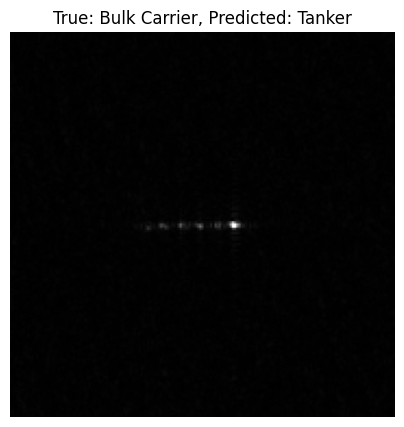

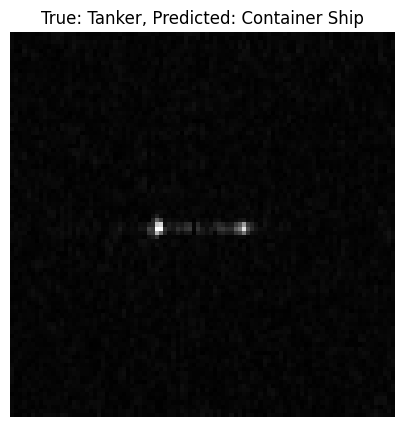

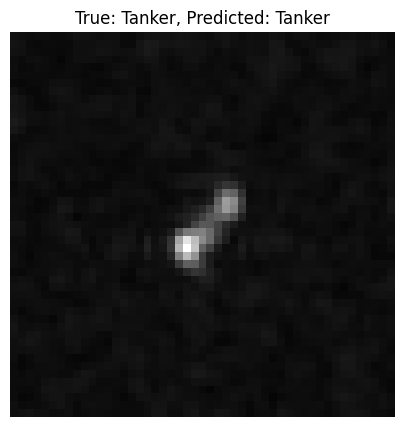

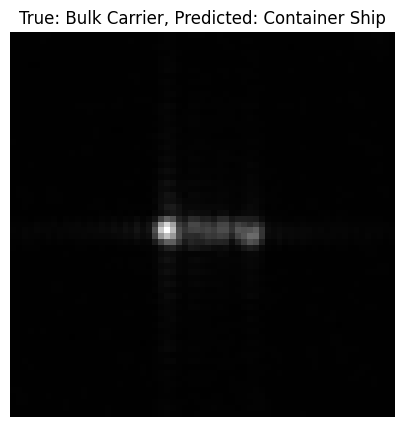

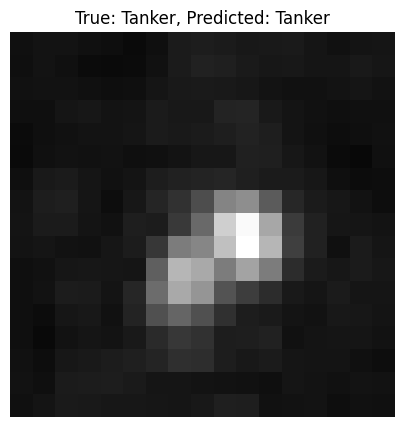

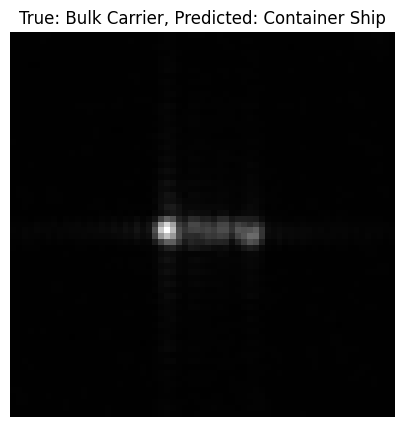

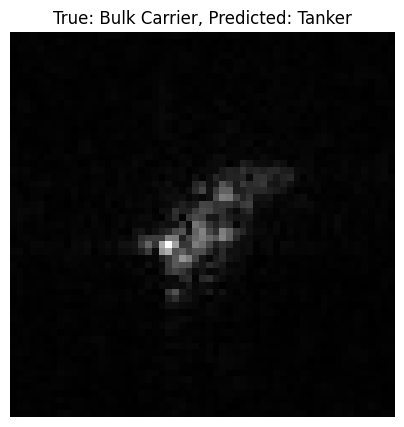

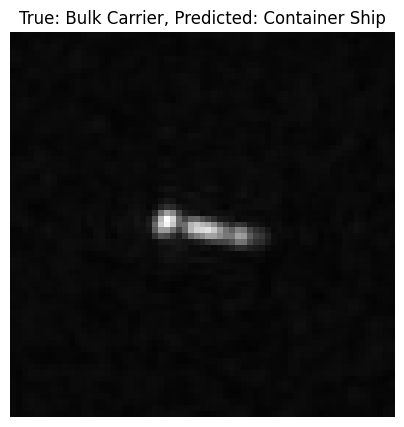

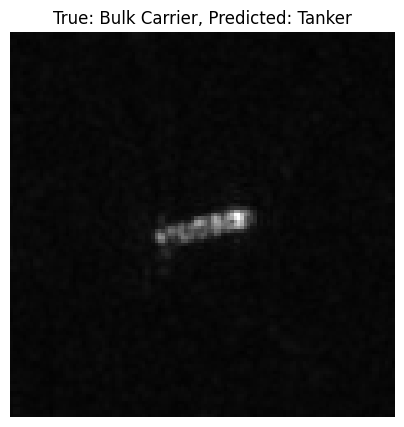

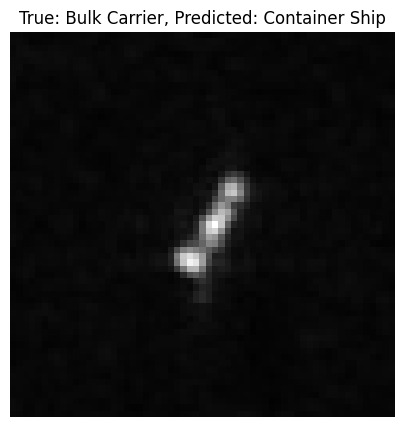

In [16]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Randomly select a few images
samples = random.sample(range(len(predictions)), 10)

for i in samples:
    img_path = os.path.join(image_base_path, test_df.iloc[i]['image_1'])
    img = load_img(img_path)
    true_label = true_categories[i]
    predicted_label = predictions[i]
    
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()


In [17]:
from collections import Counter

# Assuming you have a list of predictions
prediction_counts = Counter(predictions)
print(prediction_counts)


Counter({'Tanker': 756, 'Container Ship': 551, 'Bulk Carrier': 19})


In [18]:
test_df = pd.read_csv(os.path.join(os.getcwd(), 'Split_Tanker_Bulk_Container_frugal_vv/test.csv'))
predictions = []
true_categories = []

for index, row in test_df.iterrows():
    # img1_path = os.path.join('OpenSARShip/Categories', row['image_1'])
    img1_path = os.path.join(os.path.abspath('../OpenSARShip/Categories'), row['file_path'])
    img1_category = get_category_from_path(row['file_path'])
    img1 = load_and_preprocess_image(img1_path)
    
    predicted_category = classify_test_image(img1, siamese_network.model, reference_images)
    
    predictions.append(predicted_category)
    true_categories.append(img1_category)

1/1 [==============================] - 0s 34ms/step


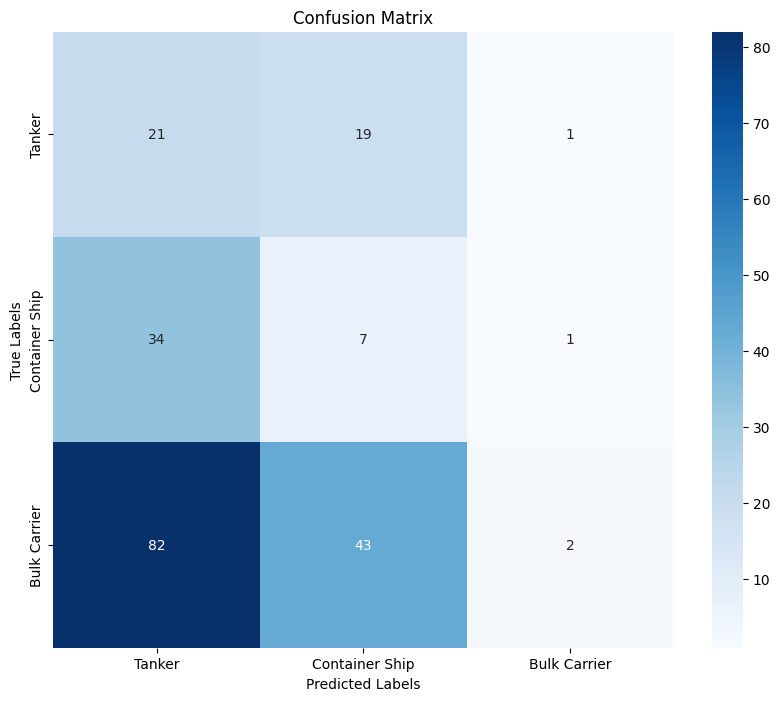

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming true_categories holds the true class labels, and predictions holds the predicted labels from your model
conf_matrix = confusion_matrix(true_categories, predictions, labels=list(reference_images.keys()))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(reference_images.keys()), yticklabels=list(reference_images.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [20]:
print(classification_report(true_categories, predictions, target_names=list(reference_images.keys())))

                precision    recall  f1-score   support

        Tanker       0.50      0.02      0.03       127
Container Ship       0.10      0.17      0.13        42
  Bulk Carrier       0.15      0.51      0.24        41

      accuracy                           0.14       210
     macro avg       0.25      0.23      0.13       210
  weighted avg       0.35      0.14      0.09       210



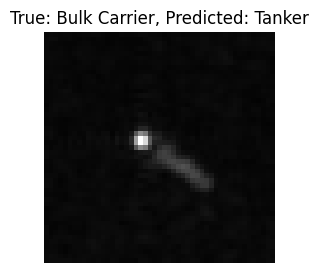

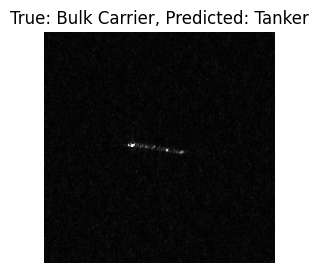

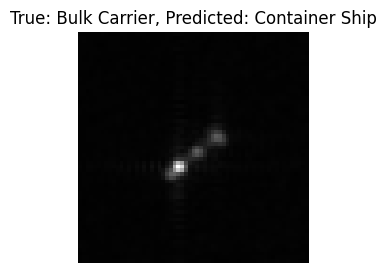

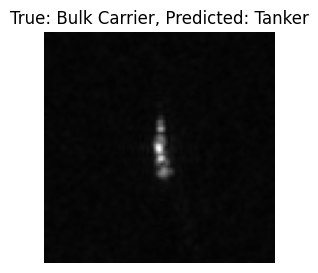

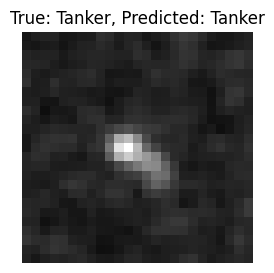

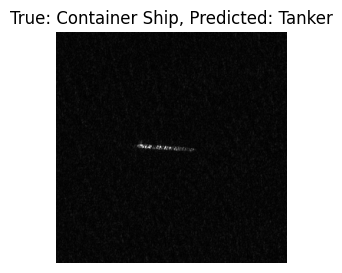

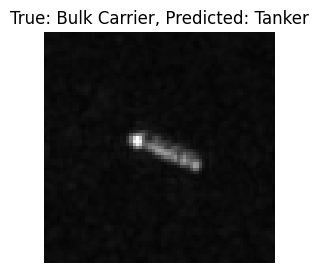

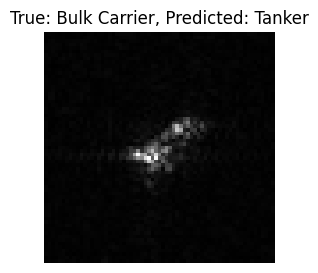

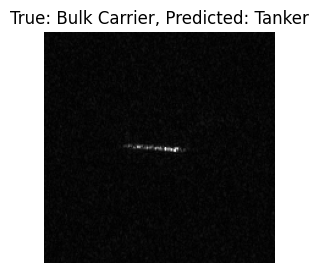

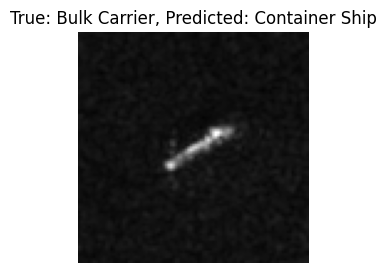

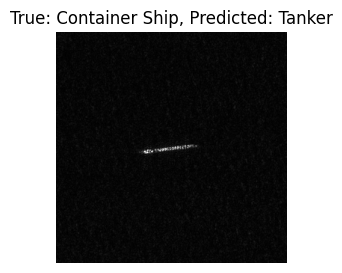

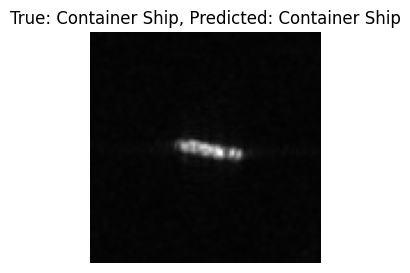

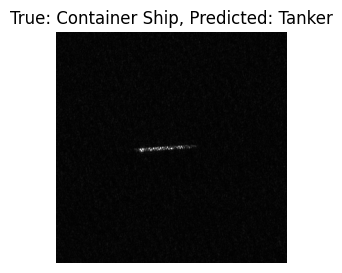

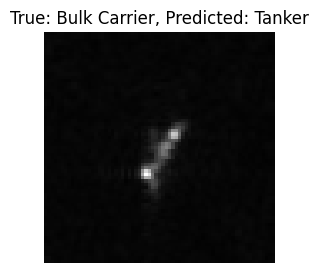

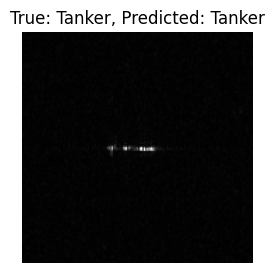

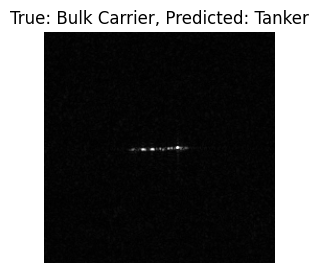

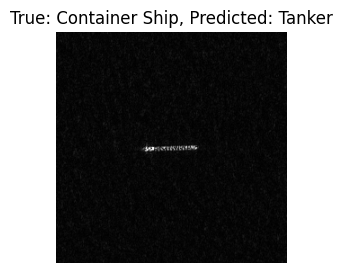

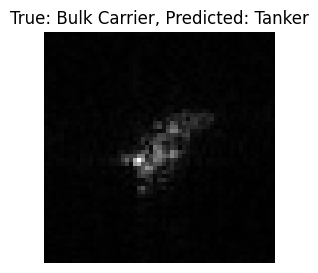

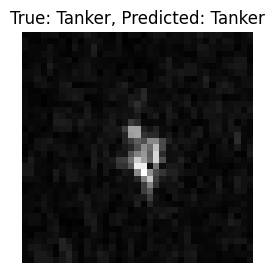

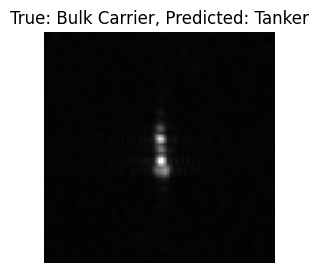

In [21]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Randomly select a few images
samples = random.sample(range(len(predictions)), 20)

for i in samples:
    img_path = os.path.join(image_base_path, test_df.iloc[i]['file_path'])
    img = load_img(img_path)
    true_label = true_categories[i]
    predicted_label = predictions[i]
    
    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

In [22]:
from collections import Counter

# Assuming you have a list of predictions
prediction_counts = Counter(predictions)
print(prediction_counts)

Counter({'Tanker': 137, 'Container Ship': 69, 'Bulk Carrier': 4})


In [24]:
reference_images = {
    'Tanker' : [load_and_preprocess_image(image_base_path + '/Tanker/Tanker_Visual_Cargo_x6945_y4168_vv.tif'),
                load_and_preprocess_image(image_base_path + '/Tanker/Tanker_Visual_Other Type_x13748_y5746_vv.tif')],
    'Container Ship' : [load_and_preprocess_image(image_base_path + '/Container Ship/ContainerShip_Visual_Cargo_x186_y2504_vv.tif'),
                        load_and_preprocess_image(image_base_path + '/Container Ship/ContainerShip_Visual_Cargo_x215_y7247_vv.tif')],
    'Bulk Carrier' : [load_and_preprocess_image(image_base_path + '/Bulk Carrier/BulkCarrier_Visual_Cargo_x48_y7700_vv.tif'),
                      load_and_preprocess_image(image_base_path + '/Bulk Carrier/BulkCarrier_Visual_Cargo_x125_y7052_vv.tif')]}

In [26]:
test_df = pd.read_csv(os.path.join(os.getcwd(), 'Split_quater_siamese/test_pairs.csv'))


predictions = []
true_categories = []

for index, row in test_df.iterrows():
    # img1_path = os.path.join('OpenSARShip/Categories', row['image_1'])
    img1_path = os.path.join(os.path.abspath('../OpenSARShip/Categories'), row['image_1'])
    img1_category = get_category_from_path(row['image_1'])
    img1 = load_and_preprocess_image(img1_path)
    
    predicted_category = classify_test_image(img1, siamese_network.model, reference_images)
    
    predictions.append(predicted_category)
    true_categories.append(img1_category)

# Now you can calculate classification metrics based on `predictions` and `true_categories`


1/1 [==============================] - 0s 84ms/step


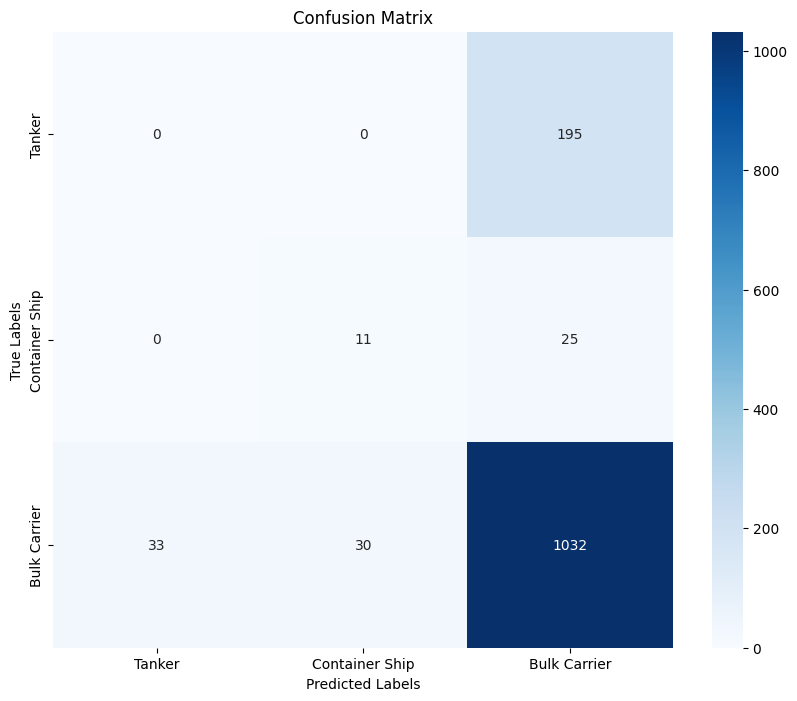

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming true_categories holds the true class labels, and predictions holds the predicted labels from your model
conf_matrix = confusion_matrix(true_categories, predictions, labels=list(reference_images.keys()))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(reference_images.keys()), yticklabels=list(reference_images.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [28]:
print(classification_report(true_categories, predictions, target_names=list(reference_images.keys())))
accuracy = accuracy_score(true_categories, predictions)
print(f"Overall accuracy: {accuracy*100:.2f}%")

                precision    recall  f1-score   support

        Tanker       0.82      0.94      0.88      1095
Container Ship       0.27      0.31      0.29        36
  Bulk Carrier       0.00      0.00      0.00       195

      accuracy                           0.79      1326
     macro avg       0.36      0.42      0.39      1326
  weighted avg       0.69      0.79      0.73      1326

Overall accuracy: 78.66%


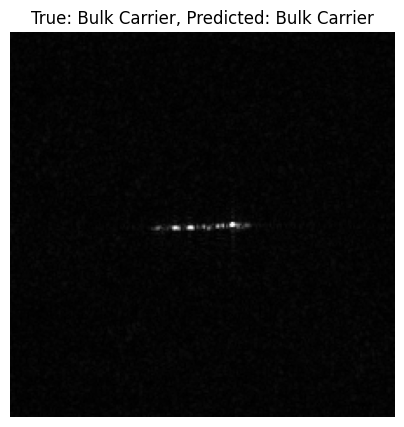

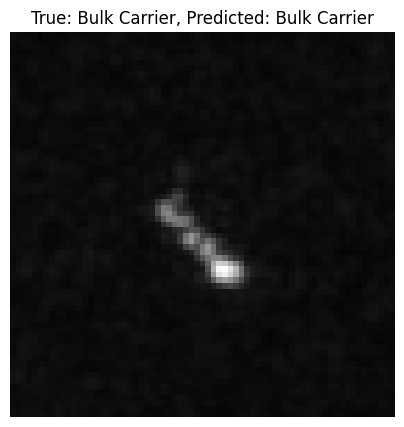

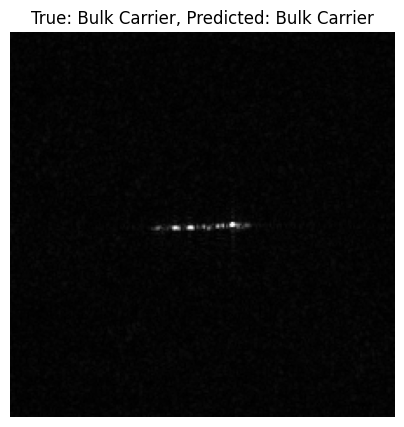

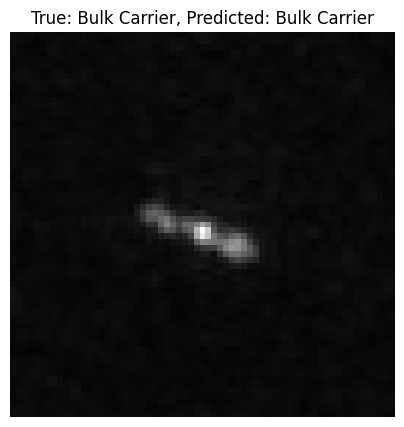

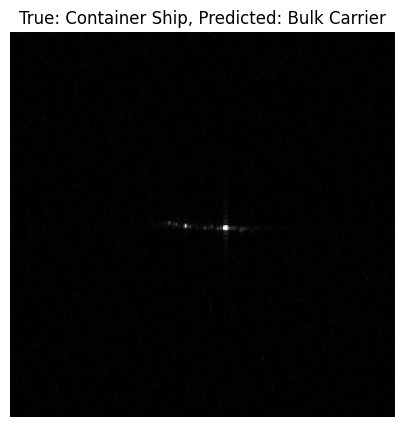

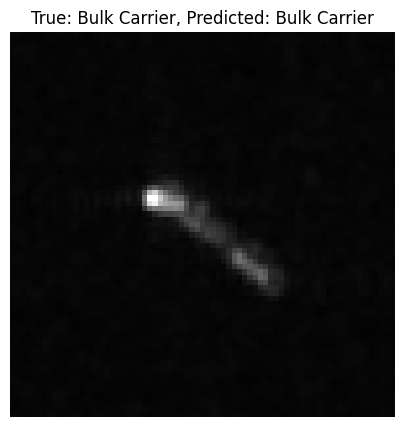

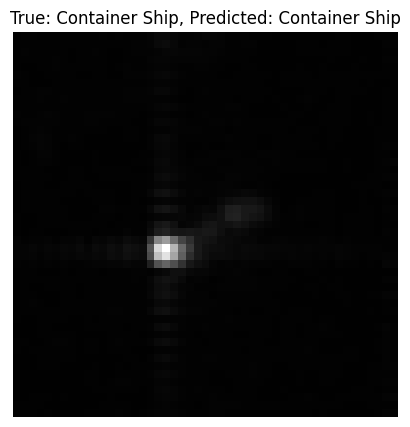

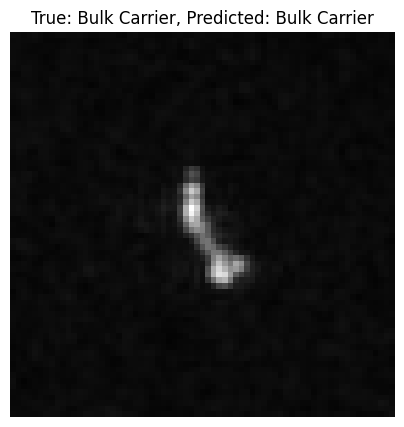

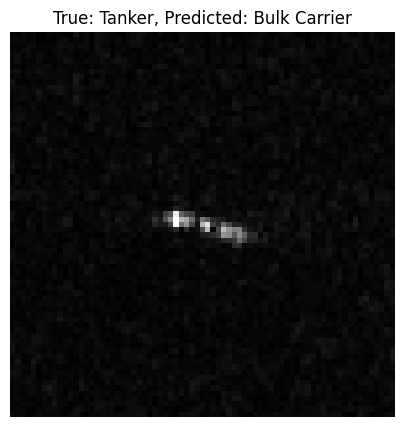

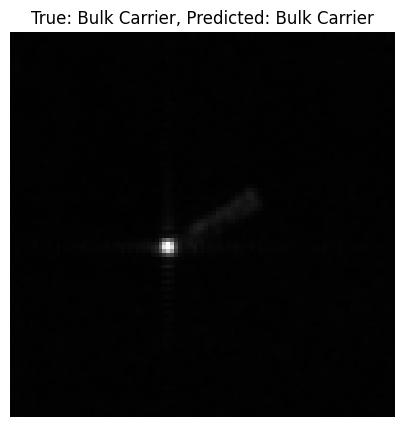

In [29]:
# Randomly select a few images
samples = random.sample(range(len(predictions)), 10)

for i in samples:
    img_path = os.path.join(image_base_path, test_df.iloc[i]['image_1'])
    img = load_img(img_path)
    true_label = true_categories[i]
    predicted_label = predictions[i]
    
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()